### Package version
- tensorflow==2.4.1rc3
- numpy==1.18.2
- matplotlib==3.2.1
- google==2.0.3
- segmentation_models==1.0.1

# U - Net
## Problem: 

Covid-19 is likely to remain an important differential diagnosis for the foreseeable future in anyone presenting to hospital with a flu-like illness, lymphopenia on full blood count, and/or a change in normal sense of smell (anosmia) or taste.12

Most people with covid-19 infection develop chest/ling infection; however, chest radiography of people who are seriously ill with respiratory symptoms when they present to hospital can help to identify those with covid-19 infection.

WHO offers advice to non-radiologists on how to look for changes on chest radiograph that may be suggestive of covid-19 pneumonia, as prompt review and report from an onsite or remote radiologist.

The recommendations are based on a combination of emerging evidence, current guidelines, and clinical experience.


So the radiographic image of the patient lung as well as the non-radiographic image of the patient's lung has been captured.

A radiographic image is produced from imaging the reflection coming from infection boundaries. The radiographic image shows the boundaries between different effected and non-effected cells. 


### Data
The data is a set of images chosen for various patients chosen at random . The images are 256 x 256 pixels and each pixel is classified as either effected cell or non-effected cell. In addition to the radiographic images, the depth of the infection is provided for each image. The goal of the competition is to segment regions that contain infection.


### Aim: 

Implement U-Net neural model architecture in keras to solve this problem.


In this, you are asked to segment infected cells in the lung.Given a set of radiographic images that are 256 x 256 pixels each and each pixel we need to classify as either infected or non-infected. Our goal is to segment regions that contain infection. 


### Broad Steps:

- Download the dataset
- Upload to Drive
- Import from drive to colab
- Load the images and create training data.
- Build U-net Model
- Train your model.
- Check the validation accuracy and plot sample.

In [ ]:
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Extract data

In [ ]:
#For simplicity we have added the required code here.
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/My_DL/S7 - Semantics + Unet/New-TakeHome/train.zip', 'r') as zf:
  zf.extractall()

####  The train file have both images and masks with the same names_ids.

### Get the list of names of images and masks and name the list imagelist and masklist.

Hint - Use os.listdir() funtions.

In [ ]:
import os
imagelist = os.listdir('train/images')
masklist = os.listdir('train/masks')

In [ ]:
#Test your list names by printing some of the names as given below.
print(imagelist[-1])
print(masklist[-1])
print(imagelist[5])
print(masklist[5])

img_130458.tif
img_130458.tif
img_119677.tif
img_119677.tif


### Read and test your images and respective masks.

Hint -

import  matplotlib.pyplot as plt

import cv2

plt.imshow(cv2.imread('path of image'))

plt.imshow(cv2.imread('path of mask'))


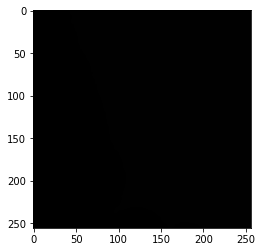

In [ ]:
import  matplotlib.pyplot as plt
import cv2

plt.imshow(cv2.imread('train/images/{}'.format(imagelist[10])))

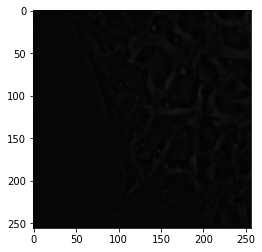

In [ ]:
plt.imshow(cv2.imread('train/masks/{}'.format(masklist[10])))

### Create your training data.

Hints - 

image_path = os.path.join('path of your image directory' +n )

mask_path = os.path.join('path of your mask directory'+n )

In [ ]:
import numpy as np

im_height, im_width = 256 , 256

# Get and resize train images and masks
def get_data(train=True):
    #ids = next(os.walk("train/images"))[2]
    X = np.zeros((len(imagelist), im_height, im_width, 1), dtype=np.float32)
    y = np.zeros((len(masklist), im_height, im_width, 1), dtype=np.float32)
    for n in imagelist:
        k = imagelist.index(n)
        image_path = os.path.join('train/images/' +n )
        mask_path = os.path.join('train/masks/' +n )
        
        # Load images
        img = cv2.imread(image_path, 0)
        resized_img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        

        # Load masks
        if train:
            mask = cv2.imread(mask_path, 0)
            resized_mask = cv2.resize(mask, (256, 256), interpolation = cv2.INTER_AREA)
            resized_mask = np.reshape(resized_mask, (256,256,1))
            
           

        # Save images
        X[k, ..., 0] = resized_img.squeeze() / 255
        if train:
            y[k] = resized_mask/255
    print('Done!')
    if train:
        return X, y
    else:
        return X
    
X, y = get_data(train=True)

Done!


In [ ]:
# Split train and valid
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()


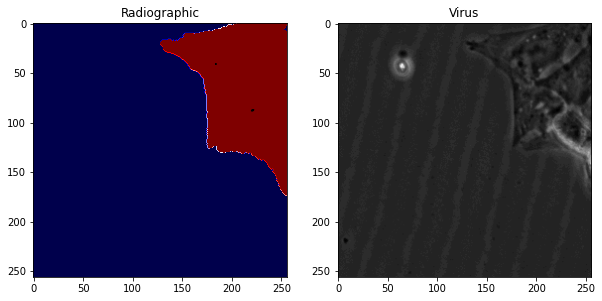

In [ ]:
## Test your data whether it looks fine - Random check
import random 
# Check if training data looks all right
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(X_train[ix, ..., 0], cmap='seismic', interpolation='bilinear')
if has_mask:
    ax[0].contour(y_train[ix].squeeze(), colors='k', levels=[0.5])
ax[0].set_title('Radiographic')

ax[1].imshow(y_train[ix].squeeze(), interpolation='bilinear', cmap='gray')
ax[1].set_title('Virus');

### Define loss and dice_coeff function.

In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

def loss(y_true, y_pred):
    return tensorflow.keras.backend.binary_crossentropy(y_true, y_pred) - tensorflow.math.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Build and compile UNet Model for your data.

Hint - 
You can install and use segmentation models from this github repository.

#### Install segmentation models

!pip install git+https://github.com/qubvel/segmentation_models

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-aer1ktlb
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-aer1ktlb
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 51kB 3.5MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp37-none-any.whl size=33794 sha256=2188673ce5d4330a77f50955e3a85bf57ef5fb04d83d8aad6ef541092cb01ca5
  Stored in directory: /tmp/pip-ephem-wheel-cache-4i1d_pd3/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [ ]:
from keras.utils import generic_utils
from segmentation_models import Unet

model = Unet(backbone_name='resnet34', encoder_weights=None, input_shape=(None, None, 1))

Segmentation Models: using `keras` framework.


In [ ]:
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 1 3           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 1 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 3136        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [ ]:
from segmentation_models import get_preprocessing

BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)
X_train = preprocess_input(X_train)
X_valid = preprocess_input(X_valid)

### Fit your model using model.fit function.
Hint - As it might take long time to run. Run it for only 1 or 2 epochs.

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=16,   
    epochs=1,
    validation_data=(X_valid, y_valid)
    )

6/6 [==============================] - 122s 19s/step - loss: 3.0922 - dice_coefficient: 0.0753 - val_loss: 6183.9448 - val_dice_coefficient: 0.0441


### Predict on val set using model.predict funtion and store in preds_val variable.



In [ ]:
preds_val = model.predict(X_valid, verbose=1)

1/1 [==============================] - 5s 5s/step


In [ ]:
#Get the threshold predictions to look at refined results.
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [ ]:
#Plot a sample
def plot_sample(X, y, preds, binary_preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Radiographic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Virus')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Virus Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Virus Predicted binary');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: No contour levels were found within the data range.


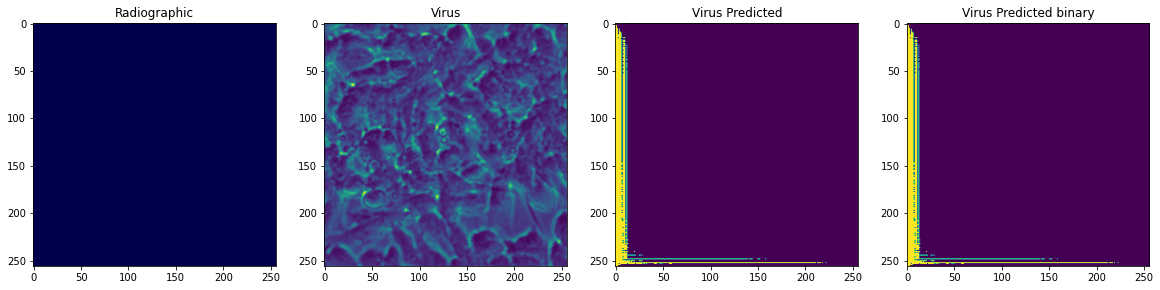

In [ ]:
# Check if valid data looks all right
plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=2)

If you are getting good results- Congratulations.
If you are not, try to explore what might be the reason.